In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import cm

In [2]:
C = 2.99792458e+8 # Speed of light(m/s)
F0 = 46.5e+6 # Operational frequency(Hz)
K = 2*np.pi*F0/C # Wave number(rad/m)

In [3]:
x_data = np.array([ \
                [ 8, 7, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 0, 0,-1,-1,-2,-2,-3], \
                [ 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,-1,-1,-1], \
                [ 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4], \
                [ 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1], \
                [13,13,13,13,12,12,12,12,11,11,11,11,11,10,10,10, 9, 9, 9], \
                [10,10,10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6], \
                [12,12,12,11,11,11,11,10,10,10,10,10, 9, 9, 9, 9, 8, 8, 8], \
                [ 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3], \
                [12,12,11,11,11,10,10,10,10, 9, 9, 8, 8, 8, 7, 7, 7, 6, 5], \
                [ 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5], \
                [ 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2], \
                [ 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0], \
                [ 3, 2, 2, 1, 1, 0, 0,-1,-2,-2,-3,-3,-4,-4,-5,-5,-6,-7,-8], \
                [ 1, 1, 1, 0, 0, 0, 0,-1,-1,-1,-1,-1,-2,-2,-2,-2,-3,-3,-3], \
                [-4,-4,-4,-5,-5,-5,-5,-6,-6,-6,-6,-6,-7,-7,-7,-7,-8,-8,-8], \
                [-1,-1,-1,-2,-2,-2,-2,-3,-3,-3,-3,-3,-4,-4,-4,-4,-5,-5,-5], \
                [-9,-9,-9,-10,-10,-10,-11,-11,-11,-11,-11,-12,-12,-12,-12,-13,-13,-13,-13], \
                [-6,-6,-6,-7,-7,-7,-7,-8,-8,-8,-8,-8,-9,-9,-9,-9,-10,-10,-10], \
                [-8,-8,-8,-9,-9,-9,-9,-10,-10,-10,-10,-10,-11,-11,-11,-11,-12,-12,-12], \
                [-3,-3,-3,-4,-4,-4,-4,-5,-5,-5,-5,-5,-6,-6,-6,-6,-7,-7,-7], \
                [-5,-6,-7,-7,-7,-8,-8,-8,-9,-9,-10,-10,-10,-10,-11,-11,-11,-12,-12], \
                [-5,-5,-5,-6,-6,-6,-6,-7,-7,-7,-7,-7,-8,-8,-8,-8,-9,-9,-9], \
                [-2,-2,-2,-3,-3,-3,-3,-4,-4,-4,-4,-4,-5,-5,-5,-5,-6,-6,-6], \
                [ 0, 0, 0,-1,-1,-1,-1,-2,-2,-2,-2,-2,-3,-3,-3,-3,-4,-4,-4], \
                [ 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0,-1,-1,-1,-1,-2,-2,-2] ])
y_data = np.array([ \
                [ 18, 19, 20, 21, 19, 20, 18, 21, 19, 22, 20, 21, 22, 20, 21, 19, 22, 20, 21], \
                [ 17, 15, 13, 18, 16, 14, 12, 19, 17, 15, 13, 11, 18, 16, 14, 12, 17, 15, 13], \
                [ 16, 14, 12, 17, 15, 13, 11, 18, 16, 14, 12, 10, 17, 15, 13, 11, 16, 14, 12], \
                [  9,  7,  5, 10,  8,  6,  4, 11,  9,  7,  5,  3, 10,  8,  6,  4,  9,  7,  5], \
                [  3,  1, -1, -3,  8,  6,  4,  2, 11,  9,  7,  5,  3, 14, 12, 10, 15, 13, 11], \
                [  8,  6,  4,  9,  7,  5,  3, 10,  8,  6,  4,  2,  9,  7,  5,  3,  8,  6,  4], \
                [  0, -2, -4,  1, -1, -3, -5,  2,  0, -2, -4, -6,  1, -1, -3, -5,  0, -2, -4], \
                [  1, -1, -3,  2,  0, -2, -4,  3,  1, -1, -3, -5,  2,  0, -2, -4,  1, -1, -3], \
                [ -6, -8, -7, -9,-11, -8,-10,-12,-14,-13,-15,-14,-16,-18,-15,-17,-19,-20,-21], \
                [ -7, -9,-11, -6, -8,-10,-12, -5, -7, -9,-11,-13, -6, -8,-10,-12, -7, -9,-11], \
                [-14,-16,-18,-13,-15,-17,-19,-12,-14,-16,-18,-20,-13,-15,-17,-19,-14,-16,-18], \
                [ -6, -8,-10, -5, -7, -9,-11, -4, -6, -8,-10,-12, -5, -7, -9,-11, -6, -8,-10], \
                [-21,-20,-22,-19,-21,-20,-22,-21,-20,-22,-19,-21,-18,-20,-19,-21,-20,-19,-18], \
                [-13,-15,-17,-12,-14,-16,-18,-11,-13,-15,-17,-19,-12,-14,-16,-18,-13,-15,-17], \
                [-12,-14,-16,-11,-13,-15,-17,-10,-12,-14,-16,-18,-11,-13,-15,-17,-12,-14,-16], \
                [ -5, -7, -9, -4, -6, -8,-10, -3, -5, -7, -9,-11, -4, -6, -8,-10, -5, -7, -9], \
                [-11,-13,-15,-10,-12,-14, -3, -5, -7, -9,-11, -2, -4, -6, -8,  3,  1, -1, -3], \
                [ -4, -6, -8, -3, -5, -7, -9, -2, -4, -6, -8,-10, -3, -5, -7, -9, -4, -6, -8], \
                [  4,  2,  0,  5,  3,  1, -1,  6,  4,  2,  0, -2,  5,  3,  1, -1,  4,  2,  0], \
                [  3,  1, -1,  4,  2,  0, -2,  5,  3,  1, -1, -3,  4,  2,  0, -2,  3,  1, -1], \
                [ 21, 20, 19, 17, 15, 18, 16, 14, 15, 13, 14, 12, 10,  8, 11,  9,  7,  8,  6], \
                [ 11,  9,  7, 12, 10,  8,  6, 13, 11,  9,  7,  5, 12, 10,  8,  6, 11,  9,  7], \
                [ 18, 16, 14, 19, 17, 15, 13, 20, 18, 16, 14, 12, 19, 17, 15, 13, 18, 16, 14], \
                [ 10,  8,  6, 11,  9,  7,  5, 12, 10,  8,  6,  4, 11,  9,  7,  5, 10,  8,  6], \
                [  2,  0, -2,  3,  1, -1, -3,  4,  2,  0, -2, -4,  3,  1, -1, -3,  2,  0, -2] ])
x_data=x_data*4.5*np.sqrt(3.0)/2.0 #実際のアンテナ座標に変換する
y_data=y_data*4.5/2.0

In [4]:
subarray = ['A1', 'A2', 'A3', 'A4', \
                    'B1', 'B2', 'B3', 'B4', \
                    'C1', 'C2', 'C3', 'C4', \
                    'D1', 'D2', 'D3', 'D4', \
                    'E1', 'E2', 'E3', 'E4', \
                    'F1', 'F2', 'F3', 'F4', 'F5']# サブアレイの個数

In [5]:
mu_pdx = pd.DataFrame(data=x_data.T, columns=subarray)#アンテナのX座標とサブアレイの間の対応
mu_pdy = pd.DataFrame(data=y_data.T, columns=subarray)#アンテナのY座標とサブアレイの間の対応
print(mu_pdx)
print(mu_pdy)

           A1         A2         A3         A4         B1         B2  \
0   31.176915  11.691343  31.176915  19.485572  50.662486  38.971143   
1   27.279800  11.691343  31.176915  19.485572  50.662486  38.971143   
2   23.382686  11.691343  31.176915  19.485572  50.662486  38.971143   
3   19.485572   7.794229  27.279800  15.588457  50.662486  35.074029   
4   19.485572   7.794229  27.279800  15.588457  46.765372  35.074029   
5   15.588457   7.794229  27.279800  15.588457  46.765372  35.074029   
6   15.588457   7.794229  27.279800  15.588457  46.765372  35.074029   
7   11.691343   3.897114  23.382686  11.691343  46.765372  31.176915   
8   11.691343   3.897114  23.382686  11.691343  42.868257  31.176915   
9    7.794229   3.897114  23.382686  11.691343  42.868257  31.176915   
10   7.794229   3.897114  23.382686  11.691343  42.868257  31.176915   
11   3.897114   3.897114  23.382686  11.691343  42.868257  31.176915   
12   0.000000   0.000000  19.485572   7.794229  42.868257  27.27

In [6]:
def beamforming(beam_azimuth,beam_zenith,subarray_name,antenna_number,mu_pdx,mu_pdy):
    '''
    beam_azimuth:beamformingの方位角（度）
    beam_zenith:beamformingの天頂角（度）
    '''
    subarray_number=len(subarray_name)
    data=np.zeros((antenna_number,subarray_number),dtype=np.float)#全ての値が０の行列を作る
    delay_dist=pd.DataFrame(data=data,columns=subarray_name)#０の行列の値を変数delay_distに代入する
    azimuth_rad=(beam_azimuth/180)*np.pi#方位角のradを計算する
    zenith_rad=(beam_zenith/180)*np.pi#天頂角のradを計算する
    for subarray_bf in subarray_name:
        for antenna_bf in range(antenna_number): #各アンテナの遅延距離を計算して、行列の０を置き換える
            delay_dist[subarray_bf][antenna_bf]=np.sin(zenith_rad)*(mu_pdx[subarray_bf][antenna_bf]*np.cos(azimuth_rad)+\
                                                                    mu_pdy[subarray_bf][antenna_bf]*np.sin(azimuth_rad))
            pass
        pass
    return delay_dist

In [7]:
def two_way_beampattern(x_target,y_target,z_target,subarray_name,antenna_number,x_rx,y_rx,mu_pdx,mu_pdy,delay_dist): 
    '''
    x_target:散乱体のX座標
    y_target:散乱体のY座標
    z_target:散乱体のZ座標
    subarray_name:two way beam patternに使う予定のサブアレイ
    antenna_number:一つのサブアレイの中のアンテナの数
    x_rx:外付け受信アンテナのX座標
    y_rx:外付け受信アンテナのY座標
    '''
    E_reflex = 0j  # 受信アンテナに到着する時の電界
    # 散乱体から受信アンテナまでの距離の計算
    path_target_rx=np.sqrt((x_rx-x_target)**2 + (y_rx-y_target)**2 + z_target**2)
    for tx_subarray in subarray_name:
        for tx_antenna in range(antenna_number): # tx_antenna:送信アンテナの具体的な番号
            #送信アンテナから散乱体までの距離の計算
            path_tx_target=np.sqrt((mu_pdx[tx_subarray][tx_antenna]-x_target)**2+\
                                   (mu_pdy[tx_subarray][tx_antenna]-y_target)**2 + z_target**2)
            # 受信した時の電界の計算
            phase=np.mod(K*(path_tx_target + path_target_rx+delay_dist[tx_subarray][tx_antenna]),2*np.pi)
            E_reflex += np.exp(-1j*phase)/(path_tx_target*path_target_rx) 
            pass
        pass
    return E_reflex


In [8]:
result_bf=beamforming(0,0,subarray,19,mu_pdx=mu_pdx,mu_pdy=mu_pdy)
print(result_bf)

     A1   A2   A3   A4   B1   B2   B3   B4   C1   C2  ...   D4   E1   E2   E3  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
11  0.0  0.0  0.0  0.0  0.0 

/var/folders/f5/19l0t_7936jbmm9x8bhdmtqw0000gn/T/ipykernel_943/1638679183.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data=np.zeros((antenna_number,subarray_number),dtype=np.float)#全ての値が０の行列を作る


In [1]:
capacity_x=np.linspace(-500,500,250,endpoint=True,dtype=float)#gridのX座標の範囲
capacity_z=np.linspace(0,1500,150,endpoint=True,dtype=float)#gridのZ座標の範囲
result_twbp=np.zeros((capacity_x.size,capacity_z.size),dtype=np.complex128)
for idx_1 in range(capacity_x.size):
    for idx_2 in range(capacity_z.size):
        #散乱体毎にtwo way beam patternを呼び出して計算する
        #受信アンテナ座標：(60,60)  高さ９００m
        result_twbp[idx_1][idx_2]=two_way_beampattern(capacity_x[idx_1],0,capacity_z[idx_2],subarray,\
                                                      19,100,100,mu_pdx=mu_pdx,mu_pdy=mu_pdy,delay_dist=result_bf)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:2825: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


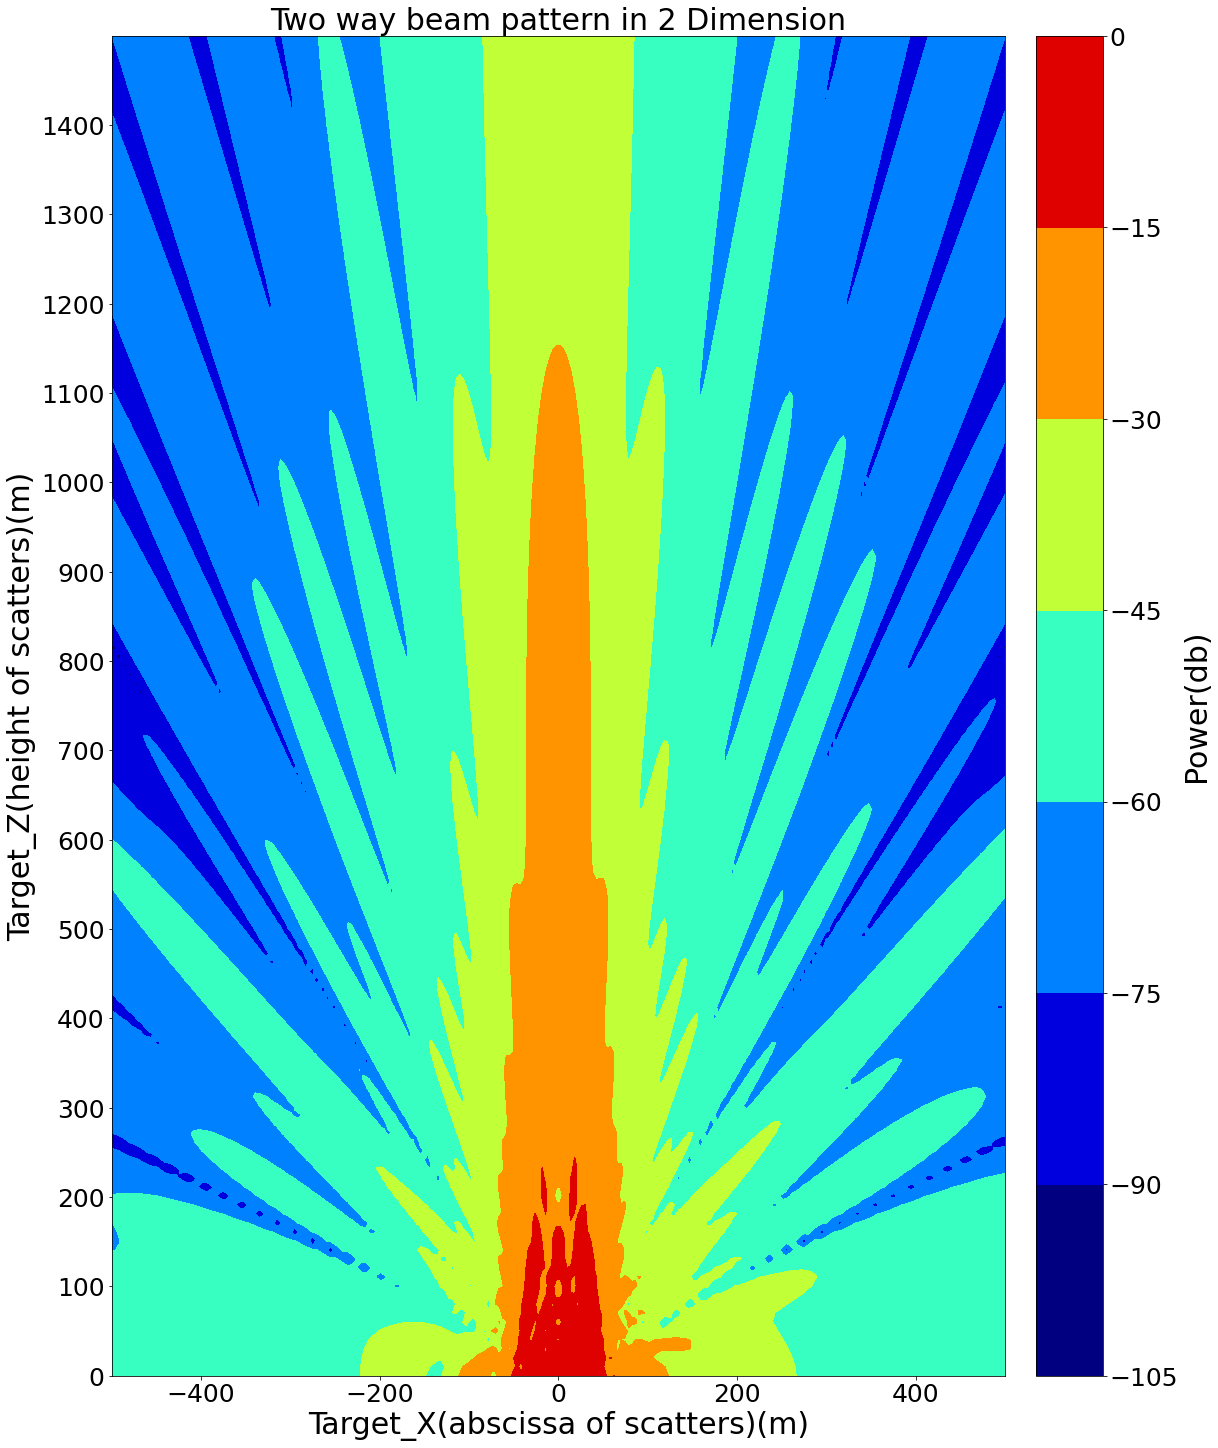

In [67]:
#二次元（平面）
power_db=10*np.log10(result_twbp*result_twbp.conjugate())
power_db=power_db-np.max(power_db)
x=capacity_x
z=capacity_z
xx,zz=np.meshgrid(x,z,indexing="ij")
fig,ax=plt.subplots(constrained_layout=True,figsize=(20,20))
fig_2D=ax.contourf(xx,zz,power_db,cmap="jet",vmin=-90)
ax.set_aspect('equal',adjustable='box')
ax.set_xlim(-500,500)
ax.set_ylim(0,1500)
ax.set_yticks(np.arange(0,1500, step=100))
ax.set_title('Two way beam pattern in 2 Dimension',fontsize="30")
ax.set_xlabel("Target_X(abscissa of scatters)(m)",fontsize="30")
ax.set_ylabel("Target_Z(height of scatters)(m)",fontsize="30")
ax.tick_params(labelsize=25)
cbar=fig.colorbar(fig_2D,orientation="vertical")
cbar.ax.set_ylabel("Power(db)",fontsize="30")
cbar.ax.tick_params(labelsize=25)
plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


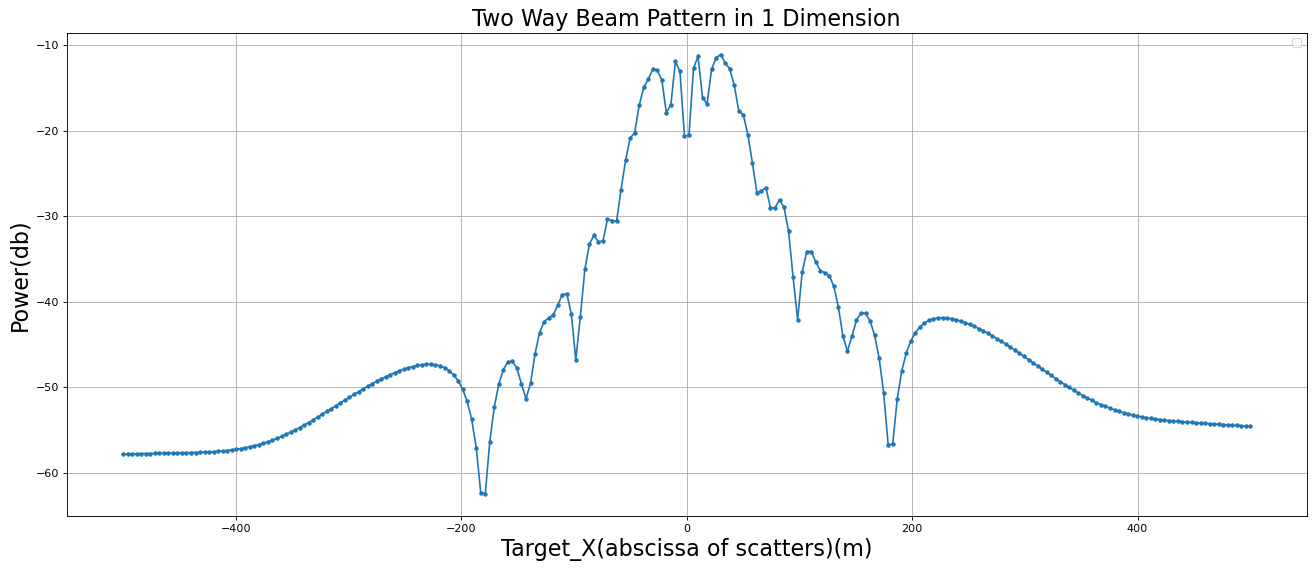

In [68]:
# 一次元
plt.figure(figsize=(20,8),dpi=80)
plt.plot(capacity_x,power_db[:,10], marker='.')
plt.title("Two Way Beam Pattern in 1 Dimension",fontsize="20")
plt.xlabel('Target_X(abscissa of scatters)(m)',fontsize="20")
plt.ylabel("Power(db)",fontsize="20")
plt.grid()
plt.legend()
plt.show()

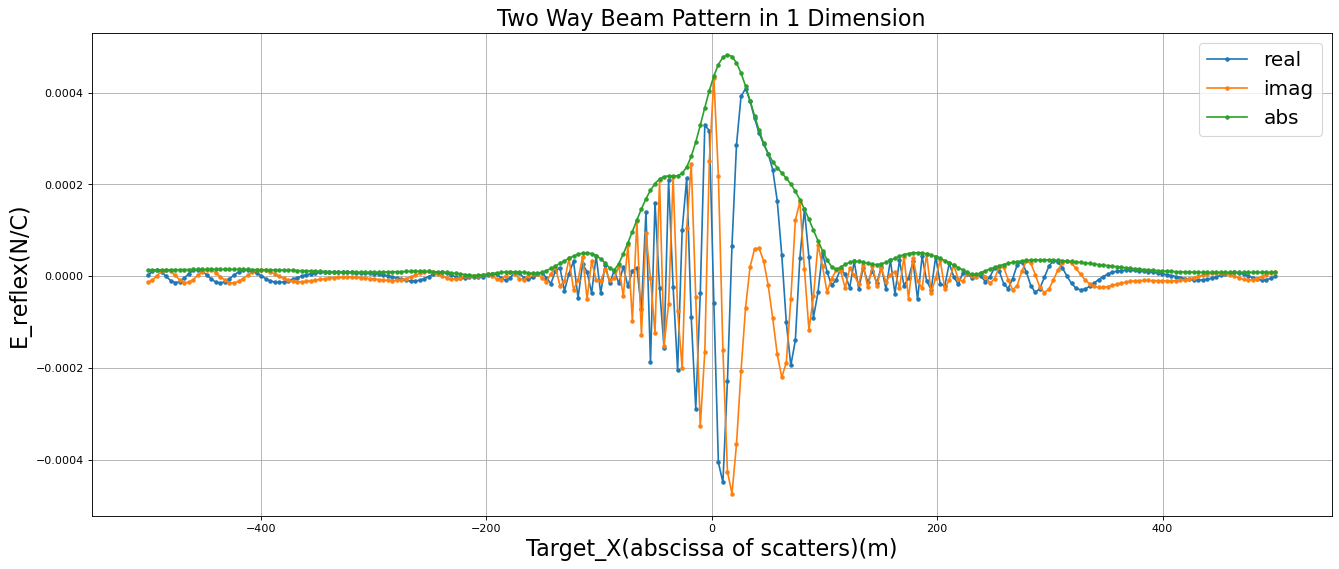

In [26]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(capacity_x,result_twbp[:,25].real, marker='.',label="real")
plt.plot(capacity_x,result_twbp[:,25].imag, marker='.',label="imag")
plt.plot(capacity_x,np.abs(result_twbp[:,25]), marker='.',label="abs")
plt.xlabel("Target_X(abscissa of scatters)(m)",fontsize="20")
plt.ylabel("E_reflex(N/C)",fontsize="20")
plt.title("Two Way Beam Pattern in 1 Dimension",fontsize="20")
plt.grid()
plt.legend(fontsize="18")
plt.show()

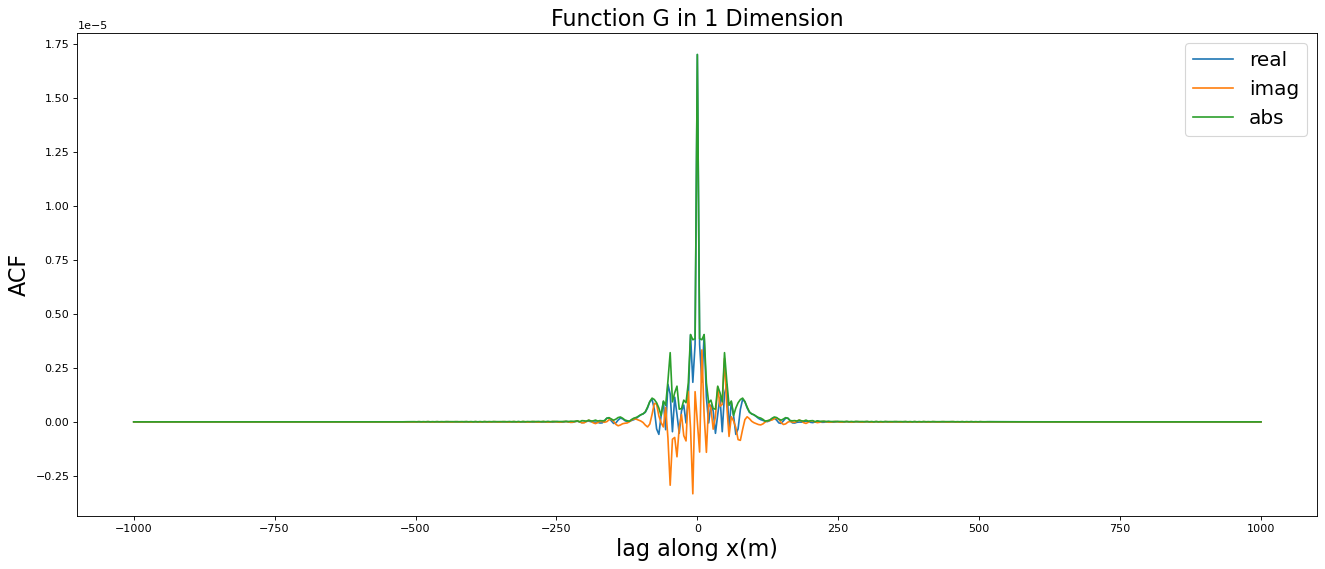

In [27]:
acf_1=signal.correlate(in1=result_twbp[:,1],in2=result_twbp[:,1])
lag =signal.correlation_lags(in1_len=result_twbp[:,0].size,in2_len=result_twbp[:,0].size)
lag=lag*(capacity_x[1]-capacity_x[0])
plt.figure(figsize=(20,8),dpi=80)
plt.plot(lag,acf_1.real,label="real")
plt.plot(lag,acf_1.imag,label="imag")
plt.plot(lag,np.abs(acf_1),label="abs")
plt.xlabel("lag along x(m)",fontsize="20")
plt.ylabel("ACF",fontsize="20")
plt.title("Function G in 1 Dimension",fontsize="20")
plt.legend(fontsize="18")

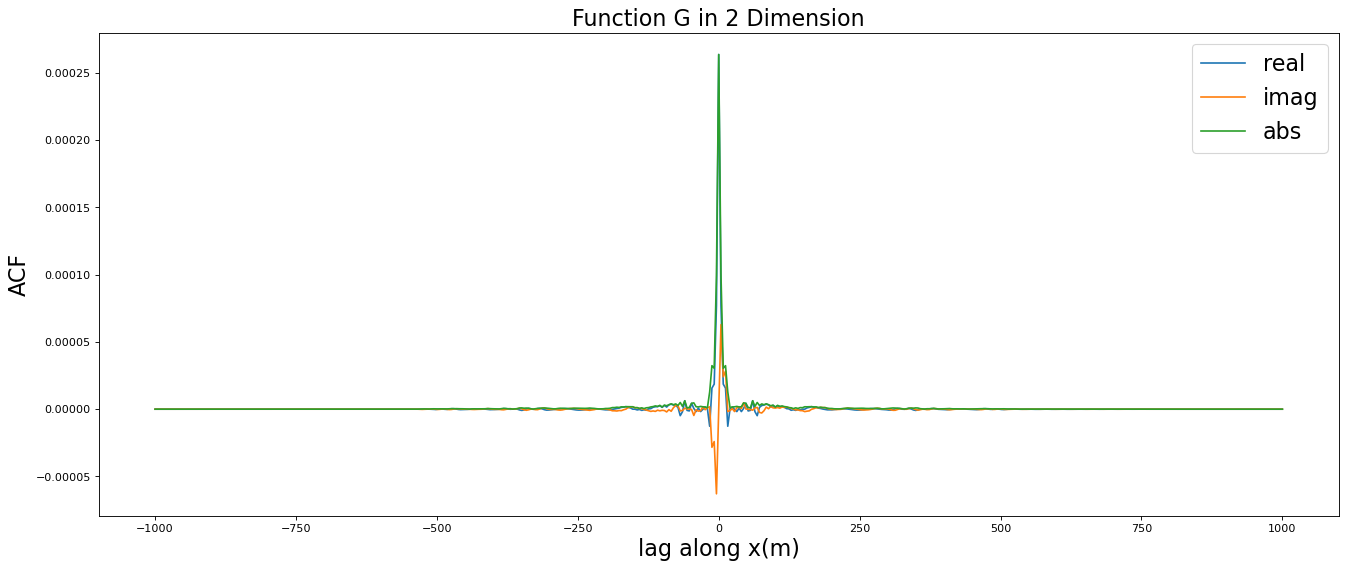

In [29]:
acf_all=np.zeros_like(lag,dtype=np.complex128)
for i in range(capacity_z.size):
    acf_all+=signal.correlate(in1=result_twbp[:,i],in2=result_twbp[:,i])
plt.figure(figsize=(20,8),dpi=80)
plt.plot(lag,acf_all.real,label="real")
plt.plot(lag,acf_all.imag,label="imag")
plt.plot(lag,np.abs(acf_all),label="abs")
plt.xlabel("lag along x(m)",fontsize="20")
plt.ylabel("ACF",fontsize="20")
plt.title("Function G in 2 Dimension",fontsize="20")
plt.legend(fontsize="20")